In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
tenx_run = '10X_P4_3'
path = f'/mnt/data/{tenx_run}/'

results_file = f'{path}/{tenx_run}.h5ad'

adata = sc.read(path + 'matrix.mtx', cache=True).T  # transpose the data
adata.var_names = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')[1]
adata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]

scanpy==1.3.1 anndata==0.6.10 numpy==1.14.3 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.19.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [64]:
adata.obs_names

Index(['AAAGTAGAGATGCCAG-1', 'AACCGCGTCCAACCAA-1', 'AACTCCCGTCGGGTCT-1',
       'AACTCTTAGTTGCAGG-1', 'AACTCTTTCATAACCG-1', 'AAGACCTAGATCCGAG-1',
       'AAGACCTAGGTGGGTT-1', 'AAGGAGCGTGCAACTT-1', 'AAGTCTGAGATAGTCA-1',
       'ACAGCTATCATACGGT-1',
       ...
       'TTCTACAAGGCAGTCA-1', 'TTGAACGTCTCTTATG-1', 'TTGCCGTCACGCCAGT-1',
       'TTGGAACGTTAGGGTG-1', 'TTGGCAACATGATCCA-1', 'TTGGCAAGTCCGTTAA-1',
       'TTGTAGGCATCCGGGT-1', 'TTTACTGCACACGCTG-1', 'TTTACTGCAGGACGTA-1',
       'TTTGTCAGTTGCGTTA-1'],
      dtype='object', name=0, length=149)

In [63]:
adata.var_names

Index(['Xkr4', 'Rp1', 'Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h',
       'Oprk1', 'Npbwr1',
       ...
       'ERCC-00163', 'ERCC-00164', 'ERCC-00165', 'ERCC-00168', 'ERCC-00170',
       'ERCC-00171', 'Gfp_transgene', 'Cre_transgene', 'Tdtom_transgene',
       'zsGreen_transgene'],
      dtype='object', name=1, length=23433)

In [32]:
adata

AnnData object with n_obs × n_vars = 149 × 23433 

In [33]:
! aws s3 ls s3://czbiohub-maca/gc_table_by_plates_processed_remux_redux/

2017-10-17 10:34:24   17952446 B000126.htseq-count-by-cell.csv
2017-10-17 10:34:24   17472437 B000127.htseq-count-by-cell.csv
2017-10-17 10:34:24    9342072 B000166.htseq-count-by-cell.csv
2017-10-17 10:34:24   12556466 B000167.htseq-count-by-cell.csv
2017-10-17 10:34:24   13003437 B000168.htseq-count-by-cell.csv
2017-10-17 10:34:39    3436244 B000404.htseq-count-by-cell.csv
2017-10-17 10:34:41   10815682 B000412.htseq-count-by-cell.csv
2017-10-17 10:34:49   10653949 B000610.htseq-count-by-cell.csv
2017-10-17 10:34:50    1922093 B000621.htseq-count-by-cell.csv
2017-10-17 10:34:51   14258117 B000633.htseq-count-by-cell.csv
2017-10-17 10:34:52    9405394 B000634.htseq-count-by-cell.csv
2017-10-17 10:34:59   16489061 B000636.htseq-count-by-cell.csv
2017-10-17 10:35:01   15289684 B000825.htseq-count-by-cell.csv
2017-10-17 10:35:13   17537394 B000826.htseq-count-by-cell.csv
2017-10-17 10:35:14   17030910 B000827.htseq-count-by-cell.csv
2017-10-17 10:35:16   15897793 B000971.htseq-count-by-c

In [46]:
bladder_plate_to_use = 'D041914'

In [47]:
! aws s3 cp --exclude "*" --include "$bladder_plate_to_use*" --recursive s3://czbiohub-maca/gc_table_by_plates_processed_remux_redux/ /mnt/data/facs_counts/

download: s3://czbiohub-maca/gc_table_by_plates_processed_remux_redux/D041914.htseq-count-by-cell.csv to ../../../../mnt/data/facs_counts/D041914.htseq-count-by-cell.csv


### Read droplet annotations

In [36]:
droplet_annotations = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/03_tissue_annotation_csv/Bladder_droplet_annotation.csv', index_col=0)
print(droplet_annotations.shape)
droplet_annotations.head()

(2500, 11)


,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster.ids,mouse.sex,mouse.id,tSNE_1,tSNE_2,channel
cell,,,,,,,,,,,
10X_P4_3_AAAGTAGAGATGCCAG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,0,M,3-M-8,-28.034252,-13.407488,10X_P4_3
10X_P4_3_AACCGCGTCCAACCAA,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-15.890827,7.453387,10X_P4_3
10X_P4_3_AACTCCCGTCGGGTCT,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,M,3-M-8,-11.131739,8.426802,10X_P4_3
10X_P4_3_AACTCTTAGTTGCAGG,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,M,3-M-8,21.559201,6.817286,10X_P4_3
10X_P4_3_AACTCTTTCATAACCG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-5.939946,19.630456,10X_P4_3


### subset droplet annotations to just this run

In [42]:
droplet_annotations_subset = droplet_annotations.query('channel == "10X_P4_3"')
print(droplet_annotations_subset.shape)
droplet_annotations_subset.head()

(149, 11)


,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster.ids,mouse.sex,mouse.id,tSNE_1,tSNE_2,channel
cell,,,,,,,,,,,
10X_P4_3_AAAGTAGAGATGCCAG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,0,M,3-M-8,-28.034252,-13.407488,10X_P4_3
10X_P4_3_AACCGCGTCCAACCAA,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-15.890827,7.453387,10X_P4_3
10X_P4_3_AACTCCCGTCGGGTCT,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,M,3-M-8,-11.131739,8.426802,10X_P4_3
10X_P4_3_AACTCTTAGTTGCAGG,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,M,3-M-8,21.559201,6.817286,10X_P4_3
10X_P4_3_AACTCTTTCATAACCG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-5.939946,19.630456,10X_P4_3


### Read facs annotatinos

In [40]:
facs_annotations = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/03_tissue_annotation_csv/Bladder_facs_annotation.csv', index_col=0)
facs_annotations.columns = facs_annotations.columns.str.replace('.', '_')
facs_annotations.index = facs_annotations.index.str.replace('.', '-')
print(facs_annotations.shape)
facs_annotations.head()

(1378, 11)


,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster_ids,mouse_sex,mouse_id,tSNE_1,tSNE_2,plate_barcode
cell,,,,,,,,,,,
A1-B000610-3_56_F-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,F,3_56_F,-7.182841,-10.895094,B000610
A1-B002764-3_38_F-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,F,3_38_F,4.199059,-11.050240,B002764
A1-B002771-3_39_F-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,F,3_39_F,-11.995435,-7.325534,B002771
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,M,3_8_M,-6.820022,-14.174246,D041914
A1-D042253-3_9_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3_9_M,-24.163538,-7.499349,D042253


In [49]:
facs_annotations_subset = facs_annotations.query('(mouse_id == "3_8_M") & (plate_barcode == @bladder_plate_to_use)')
print(facs_annotations_subset.shape)
facs_annotations_subset.head()

(317, 11)


,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster_ids,mouse_sex,mouse_id,tSNE_1,tSNE_2,plate_barcode
cell,,,,,,,,,,,
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,M,3_8_M,-6.820022,-14.174246,D041914
A10-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3_8_M,-16.643703,-2.434115,D041914
A11-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,0,M,3_8_M,-8.102068,-17.873610,D041914
A12-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3_8_M,-21.307140,2.633208,D041914
A13-D041914-3_8_M-1-1,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,0,M,3_8_M,5.418347,-26.099985,D041914


In [101]:
facs_annotations_subset.query('cell_ontology_class == "bladder urothelial cell"').head()

,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster_ids,mouse_sex,mouse_id,tSNE_1,tSNE_2,plate_barcode
cell,,,,,,,,,,,
A15-D041914-3_8_M-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,M,3_8_M,12.824701,22.522847,D041914
A16-D041914-3_8_M-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,4,M,3_8_M,21.264186,23.671775,D041914
A17-D041914-3_8_M-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,4,M,3_8_M,21.559859,21.387896,D041914
A18-D041914-3_8_M-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,4,M,3_8_M,24.464130,19.392865,D041914
A20-D041914-3_8_M-1-1,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,M,3_8_M,14.796384,24.363092,D041914


In [50]:
facs_counts = pd.read_csv(f'/mnt/data/facs_counts/{bladder_plate_to_use}.htseq-count-by-cell.csv', index_col=0)
columns_to_drop = [x for x in facs_counts.columns if '_' in x] + ['TAXON']
facs_counts = facs_counts.drop(columns=columns_to_drop)
facs_counts.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
A12-D041914-3_8_M-1-1,0,194,28,57,0,2,3,0,0,0,...,0,0,0,0,0,299,0,2,0,41
B16-D041914-3_8_M-1-1,0,460,0,0,0,0,230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C18-D041914-3_8_M-1-1,0,692,62,73,113,5,0,0,0,3,...,0,0,13,0,30,6,0,378,0,196
D22-D041914-3_8_M-1-1,0,90,16,7,0,0,1,0,0,22,...,0,1,0,0,0,0,0,0,0,0
F4-D041914-3_8_M-1-1,0,59,8,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,4,0,0


## Dot products of facs data


Pick two cells that are in the same cluster and annotated the same

In [102]:
# Both in cluster2, annotated as "bladder cell"
facs_cell_a = 'A10-D041914-3_8_M-1-1'
facs_cell_b = 'A12-D041914-3_8_M-1-1'

# Cluster 3, but also  "bladder urothelial cell"
facs_cell_c = 'A15-D041914-3_8_M-1-1'

In [104]:
facs_x = facs_counts.loc[facs_cell_a]
facs_y = facs_counts.loc[facs_cell_b]
facs_z = facs_counts.loc[facs_cell_c]

np.dot(facs_x, facs_y)

41737785706

In [105]:
facs_x.corr(facs_y)

0.9516412126034777

In [106]:
facs_x.corr(facs_z)

0.7178551838364595

In [107]:
facs_x.corr(facs_y, method='spearman')

0.5767937913621816

In [108]:
(facs_x > 0).corr(facs_y > 0)

0.5379428064333963

In [109]:
(facs_x > 0).corr(facs_z > 0)

0.44517106600194273

## Dot products of droplet data

In [60]:
droplet_annotations_subset.head()

,tissue,subtissue,cell_ontology_class,cell_ontology_id,free_annotation,cluster.ids,mouse.sex,mouse.id,tSNE_1,tSNE_2,channel
cell,,,,,,,,,,,
10X_P4_3_AAAGTAGAGATGCCAG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,0,M,3-M-8,-28.034252,-13.407488,10X_P4_3
10X_P4_3_AACCGCGTCCAACCAA,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-15.890827,7.453387,10X_P4_3
10X_P4_3_AACTCCCGTCGGGTCT,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,5,M,3-M-8,-11.131739,8.426802,10X_P4_3
10X_P4_3_AACTCTTAGTTGCAGG,Bladder,NaN,bladder urothelial cell,CL:1001428,Luminal bladder epithelial cell,3,M,3-M-8,21.559201,6.817286,10X_P4_3
10X_P4_3_AACTCTTTCATAACCG,Bladder,NaN,bladder cell,CL:1001319,Bladder mesenchymal cell,2,M,3-M-8,-5.939946,19.630456,10X_P4_3


Pick some cells

In [92]:

# Both in cluster2, annotated as "bladder cell"
droplet_cell_a = 'AACCGCGTCCAACCAA-1'
droplet_cell_b = 'AACTCTTTCATAACCG-1'

# in cluster 3, "bladder urothelial cell"
droplet_cell_c = 'AACTCTTAGTTGCAGG-1'

In [110]:
index = adata.var_names

droplet_x = pd.Series(adata[droplet_cell_a, :].X.toarray(), index=index)
droplet_y = pd.Series(adata[droplet_cell_b, :].X.toarray(), index=index)
droplet_z = pd.Series(adata[droplet_cell_c, :].X.toarray(), index=index)

np.dot(droplet_x, droplet_y)

625094.0

In [111]:
droplet_x.corr(droplet_y)

0.8671407957916231

In [112]:
droplet_x.corr(droplet_z)

0.5792142448792879

In [113]:
droplet_x.corr(droplet_y, method='spearman')

0.5313184924613816

In [114]:
(droplet_x > 0).corr(droplet_y > 0)

0.48979496737274747

In [115]:
(droplet_x > 0).corr(droplet_z > 0)

0.4310073646429292

## Facs vs droplet

###  x vs x - same cell types

In [116]:
droplet_x.corr(facs_x)

0.19092797757213742

In [117]:
(droplet_x > 0).corr(facs_x > 0)

0.5023687519063417

### x vs z - different cell types

In [119]:
droplet_x.corr(facs_z)

0.18566616322026358

In [118]:
(droplet_x > 0).corr(facs_z > 0)

0.4268088649421203

### TODO: ie, making the nearest neighbor more likely to be of same type?

In [122]:
facs_counts_t = facs_counts.T
facs_counts_t.head()

SAMPLE_ID,A12-D041914-3_8_M-1-1,B16-D041914-3_8_M-1-1,C18-D041914-3_8_M-1-1,D22-D041914-3_8_M-1-1,F4-D041914-3_8_M-1-1,C19-D041914-3_8_M-1-1,E1-D041914-3_8_M-1-1,A13-D041914-3_8_M-1-1,B17-D041914-3_8_M-1-1,A14-D041914-3_8_M-1-1,...,L6-D041914-3_8_M-1-1,M10-D041914-3_8_M-1-1,N13-D041914-3_8_M-1-1,O16-D041914-3_8_M-1-1,P21-D041914-3_8_M-1-1,G7-D041914-3_8_M-1-1,H18-D041914-3_8_M-1-1,J1-D041914-3_8_M-1-1,K5-D041914-3_8_M-1-1,L7-D041914-3_8_M-1-1
0610005C13Rik,0,0,0,0,0,0,0,0,33,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,194,460,692,90,59,277,234,124,96,191,...,47,36,104,165,53,100,0,41,20,157
0610007L01Rik,28,0,62,16,8,15,14,3,13,78,...,95,5,34,49,2,5,0,74,0,0
0610007N19Rik,57,0,73,7,0,0,158,57,13,15,...,55,16,3,0,16,21,0,64,42,73
0610007P08Rik,0,0,113,0,0,0,26,4,0,2,...,1,0,0,3,0,112,25,0,4,0


In [124]:
facs_counts_t_corr = facs_counts_t.corr()

In [125]:
facs_counts_t_corr.head()

SAMPLE_ID,A12-D041914-3_8_M-1-1,B16-D041914-3_8_M-1-1,C18-D041914-3_8_M-1-1,D22-D041914-3_8_M-1-1,F4-D041914-3_8_M-1-1,C19-D041914-3_8_M-1-1,E1-D041914-3_8_M-1-1,A13-D041914-3_8_M-1-1,B17-D041914-3_8_M-1-1,A14-D041914-3_8_M-1-1,...,L6-D041914-3_8_M-1-1,M10-D041914-3_8_M-1-1,N13-D041914-3_8_M-1-1,O16-D041914-3_8_M-1-1,P21-D041914-3_8_M-1-1,G7-D041914-3_8_M-1-1,H18-D041914-3_8_M-1-1,J1-D041914-3_8_M-1-1,K5-D041914-3_8_M-1-1,L7-D041914-3_8_M-1-1
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
A12-D041914-3_8_M-1-1,1.000000,0.270154,0.792585,0.896911,0.957859,0.852630,0.971972,0.946804,0.856561,0.945998,...,0.964814,0.945144,0.939294,0.796624,0.848566,0.952799,0.864957,0.950463,0.957821,0.952753
B16-D041914-3_8_M-1-1,0.270154,1.000000,0.647724,0.453585,0.244237,0.545219,0.253040,0.254116,0.538340,0.240441,...,0.240740,0.241165,0.242975,0.656040,0.567065,0.253552,0.549691,0.241510,0.254154,0.250646
C18-D041914-3_8_M-1-1,0.792585,0.647724,1.000000,0.917861,0.828891,0.970141,0.820113,0.826408,0.969835,0.826536,...,0.822679,0.824690,0.826726,0.977743,0.976924,0.827790,0.963758,0.828409,0.833030,0.803667
D22-D041914-3_8_M-1-1,0.896911,0.453585,0.917861,1.000000,0.945430,0.969665,0.926628,0.950839,0.971325,0.950667,...,0.933616,0.948948,0.949254,0.933062,0.966148,0.937899,0.981698,0.956313,0.944138,0.916763
F4-D041914-3_8_M-1-1,0.957859,0.244237,0.828891,0.945430,1.000000,0.894479,0.986340,0.978878,0.906126,0.986555,...,0.993419,0.983655,0.980949,0.830368,0.895196,0.981315,0.907609,0.993444,0.986902,0.958864


In [123]:
facs_counts_t_binarized = facs_counts_t > 0
facs_counts_t_binarized.head()

SAMPLE_ID,A12-D041914-3_8_M-1-1,B16-D041914-3_8_M-1-1,C18-D041914-3_8_M-1-1,D22-D041914-3_8_M-1-1,F4-D041914-3_8_M-1-1,C19-D041914-3_8_M-1-1,E1-D041914-3_8_M-1-1,A13-D041914-3_8_M-1-1,B17-D041914-3_8_M-1-1,A14-D041914-3_8_M-1-1,...,L6-D041914-3_8_M-1-1,M10-D041914-3_8_M-1-1,N13-D041914-3_8_M-1-1,O16-D041914-3_8_M-1-1,P21-D041914-3_8_M-1-1,G7-D041914-3_8_M-1-1,H18-D041914-3_8_M-1-1,J1-D041914-3_8_M-1-1,K5-D041914-3_8_M-1-1,L7-D041914-3_8_M-1-1
0610005C13Rik,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
0610007C21Rik,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
0610007L01Rik,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,False,False
0610007N19Rik,True,False,True,True,False,False,True,True,True,True,...,True,True,True,False,True,True,False,True,True,True
0610007P08Rik,False,False,True,False,False,False,True,True,False,True,...,True,False,False,True,False,True,True,False,True,False


In [126]:
facs_counts_t_binarized_corr = facs_counts_t_binarized.corr()
facs_counts_t_binarized_corr.head()

SAMPLE_ID,A12-D041914-3_8_M-1-1,B16-D041914-3_8_M-1-1,C18-D041914-3_8_M-1-1,D22-D041914-3_8_M-1-1,F4-D041914-3_8_M-1-1,C19-D041914-3_8_M-1-1,E1-D041914-3_8_M-1-1,A13-D041914-3_8_M-1-1,B17-D041914-3_8_M-1-1,A14-D041914-3_8_M-1-1,...,L6-D041914-3_8_M-1-1,M10-D041914-3_8_M-1-1,N13-D041914-3_8_M-1-1,O16-D041914-3_8_M-1-1,P21-D041914-3_8_M-1-1,G7-D041914-3_8_M-1-1,H18-D041914-3_8_M-1-1,J1-D041914-3_8_M-1-1,K5-D041914-3_8_M-1-1,L7-D041914-3_8_M-1-1
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
A12-D041914-3_8_M-1-1,1.000000,0.397036,0.424408,0.441605,0.453207,0.394207,0.524735,0.537942,0.423820,0.495148,...,0.547621,0.500054,0.480863,0.417044,0.421444,0.492225,0.440766,0.536872,0.509535,0.469466
B16-D041914-3_8_M-1-1,0.397036,1.000000,0.494941,0.537073,0.346775,0.460854,0.392846,0.414745,0.496479,0.400253,...,0.422377,0.408560,0.373409,0.519046,0.506505,0.398392,0.533789,0.410727,0.386330,0.381565
C18-D041914-3_8_M-1-1,0.424408,0.494941,1.000000,0.567509,0.357445,0.704976,0.425737,0.450370,0.585872,0.441473,...,0.465161,0.445169,0.405755,0.582738,0.561552,0.407736,0.606150,0.443247,0.427808,0.400665
D22-D041914-3_8_M-1-1,0.441605,0.537073,0.567509,1.000000,0.368643,0.531153,0.442748,0.465593,0.564723,0.452451,...,0.473109,0.453955,0.407933,0.575098,0.564493,0.420348,0.603186,0.453968,0.434162,0.413493
F4-D041914-3_8_M-1-1,0.453207,0.346775,0.357445,0.368643,1.000000,0.335074,0.468295,0.447736,0.358832,0.433667,...,0.465652,0.438552,0.426104,0.362377,0.364032,0.451450,0.365774,0.460438,0.440118,0.417568


In [231]:

def get_ontology_corr(correl, groupby='cell_ontology_class'):
    ontology_corrs = pd.DataFrame()

    for cell_ontology, df in facs_annotations_subset.groupby(groupby):
        print(cell_ontology, df.shape)

        corr_cell_subset = correl.loc[df.index, df.index]

        # k=1th diagnoal to ignore self correlations
        upper_triangle = np.triu(corr_cell_subset, k=1)
        upper_triangle[upper_triangle == 0] = np.nan

        # Flatten values and remove NAs for mean/median
        flattened = upper_triangle.flatten()
        flattened = flattened[~np.isnan(flattened)]
        flattened = pd.Series(flattened, name='correl')
        flattened = flattened.to_frame()
        flattened[groupby] = f'{cell_ontology} (within-group)'
        
        ontology_corrs = pd.concat([ontology_corrs, flattened])
        print(np.median(flattened.correl))
    return ontology_corrs

In [232]:
facs_counts_ontology_corrs = get_ontology_corr(facs_counts_t_corr)
facs_counts_ontology_corrs['dataset'] = 'counts'
facs_counts_ontology_corrs.head()

bladder cell (201, 11)
0.9801873816601785
bladder urothelial cell (116, 11)
0.9715205407445322


,correl,cell_ontology_class,dataset
0,0.968884,bladder cell (within-group),counts
1,0.981833,bladder cell (within-group),counts
2,0.952425,bladder cell (within-group),counts
3,0.980420,bladder cell (within-group),counts
4,0.977191,bladder cell (within-group),counts


In [233]:
facs_binarized_ontology_corrs = get_ontology_corr(facs_counts_t_binarized_corr)
facs_binarized_ontology_corrs['dataset'] = 'binarized'
facs_binarized_ontology_corrs.head()

bladder cell (201, 11)
0.5107204503729246
bladder urothelial cell (116, 11)
0.5599342197843256


,correl,cell_ontology_class,dataset
0,0.472281,bladder cell (within-group),binarized
1,0.469720,bladder cell (within-group),binarized
2,0.458438,bladder cell (within-group),binarized
3,0.463338,bladder cell (within-group),binarized
4,0.466131,bladder cell (within-group),binarized


In [234]:
ontology_corrs = pd.concat([facs_counts_ontology_corrs, facs_binarized_ontology_corrs], ignore_index=True)
ontology_corrs.head()

,correl,cell_ontology_class,dataset
0,0.968884,bladder cell (within-group),counts
1,0.981833,bladder cell (within-group),counts
2,0.952425,bladder cell (within-group),counts
3,0.980420,bladder cell (within-group),counts
4,0.977191,bladder cell (within-group),counts


In [235]:
import seaborn as sns

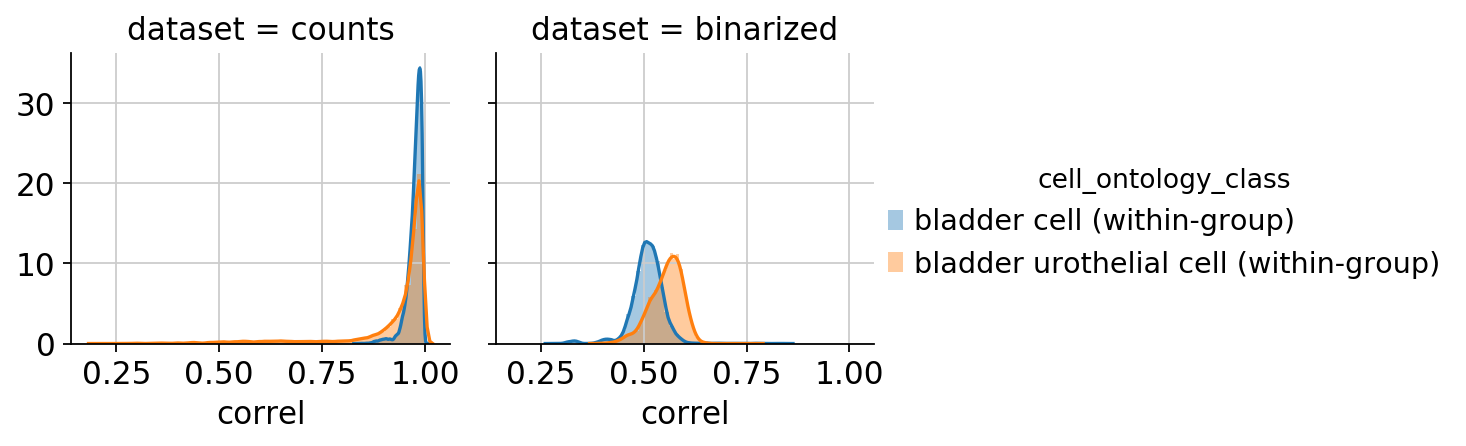

In [236]:
g = sns.FacetGrid(ontology_corrs, col='dataset', hue='cell_ontology_class')
g.map(sns.distplot, 'correl')
g.add_legend()

In [242]:

def get_across_ontology_corr(correl, groupby='cell_ontology_class'):
    ontology_corrs = pd.DataFrame()
    
    seen = set()

    for cell_ontology1, df1 in facs_annotations_subset.groupby(groupby):
        print('cell ontology 1', cell_ontology1, df1.shape)
        for cell_ontology2, df2 in facs_annotations_subset.groupby(groupby):
            if cell_ontology1 == cell_ontology2:
                continue
                
            pair = tuple(sorted([cell_ontology1, cell_ontology2]))
            if pair in seen:
                continue
            seen.add(pair)
            
            print('cell ontology 2', cell_ontology2, df2.shape)

            corr_cell_subset = correl.loc[df1.index, df2.index]

            # K=0 because there aren't self correlations here
            upper_triangle = np.triu(corr_cell_subset)
            upper_triangle[upper_triangle == 0] = np.nan

            # Flatten values and remove NAs for mean/median
            flattened = upper_triangle.flatten()
            flattened = flattened[~np.isnan(flattened)]
            flattened = pd.Series(flattened, name='correl')
            flattened = flattened.to_frame()
            flattened[groupby] = f'{cell_ontology1} - {cell_ontology2}'

            ontology_corrs = pd.concat([ontology_corrs, flattened])
            print(np.median(flattened.correl))
    return ontology_corrs

facs_counts_across_ontology_corr = get_across_ontology_corr(facs_counts_t_corr)
facs_counts_across_ontology_corr['dataset'] = 'counts'
facs_counts_across_ontology_corr.head()

cell ontology 1 bladder cell (201, 11)
cell ontology 2 bladder urothelial cell (116, 11)
0.8739761491474396
cell ontology 1 bladder urothelial cell (116, 11)


,correl,cell_ontology_class,dataset
0,0.700505,bladder cell - bladder urothelial cell,counts
1,0.181172,bladder cell - bladder urothelial cell,counts
2,0.931352,bladder cell - bladder urothelial cell,counts
3,0.885563,bladder cell - bladder urothelial cell,counts
4,0.648100,bladder cell - bladder urothelial cell,counts


In [243]:
facs_binarized_across_ontology_corr = get_across_ontology_corr(facs_counts_t_binarized_corr)
facs_binarized_across_ontology_corr['dataset'] = 'binarized'
facs_binarized_across_ontology_corr.head()

cell ontology 1 bladder cell (201, 11)
cell ontology 2 bladder urothelial cell (116, 11)
0.4307581393164679
cell ontology 1 bladder urothelial cell (116, 11)


,correl,cell_ontology_class,dataset
0,0.380366,bladder cell - bladder urothelial cell,binarized
1,0.353195,bladder cell - bladder urothelial cell,binarized
2,0.369725,bladder cell - bladder urothelial cell,binarized
3,0.357949,bladder cell - bladder urothelial cell,binarized
4,0.389285,bladder cell - bladder urothelial cell,binarized


In [244]:
across_ontology_corr = pd.concat([facs_binarized_across_ontology_corr, facs_counts_across_ontology_corr])

In [245]:
all_ontology_corr = pd.concat([across_ontology_corr, ontology_corrs])

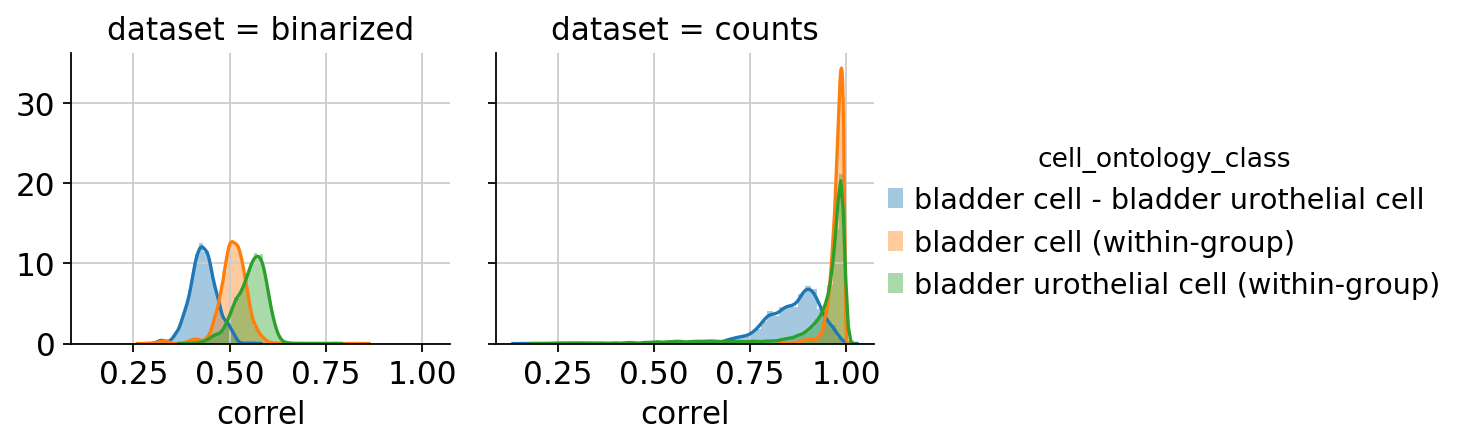

In [246]:
g = sns.FacetGrid(all_ontology_corr, col='dataset', hue='cell_ontology_class')
g.map(sns.distplot, 'correl')
g.add_legend()